# TF-IDF, clasificación

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
# stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:

import nltk
import numpy as np
from nltk.stem import SnowballStemmer

import unicodedata
import re

spanish_stemmer = SnowballStemmer('spanish')

verb_dict = {
    'q': 'que',
    'x': 'por',
    'd': 'de',
    'k': 'que',
    'atravez': 'a traves',
    'tb': 'tambien',
    'haceerle': 'hacerle',
    'compañia': 'compania',
    'aser': "hacer",
    'veder': "vender",
    "rub": "ruc",
    "fatura": "factura",
    "eletronica": "electronica",
    "haorita": "ahorita",
    "presio": "precio",
    "realizdo": "realizado",
    "natura": "natural",
    "info": "informacion",
    "clmo": "como",
    "cimo": "como",
    "mail": "correo",
    "email": "correo",
    "eata": "esta",
    "realizdo": "realizado",
    "cualqueir": "cualquier",
    "ola": "hola"

}

def bag_of_words(sentence, words):
    
    sentence_words, count = clean_count_words(sentence)
    bag = [0] * len(words)
    
   #  print("TO PREDICT: bag_of_words: ", sentence_words)

    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    
    return np.array(bag)




def unicodeToAscii(s):
    
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    
    s = unicodeToAscii(s.lower().strip())
    # print(s)
    # TO-DO validate if is url not separate dot
    s = re.sub(r"\s+", r" ", s).strip()

    new_s = ""
    s_split = s.split(" ")
    for word in s_split:
        t_word = word
        if "http" not in t_word:

            for key, value in verb_dict.items():
                if t_word == key:
                    t_word = value

            # replace special
            t_word = re.sub(r"([,.!?])", r" \1 ", t_word)
            # print("1|%s|" % t_word)
            t_word = re.sub(r"[^üáéíóúa-zA-Z\d]+", r" ", t_word)
            # print("2|%s|" % t_word)
            t_word = re.sub(r"\s+", r" ", t_word).strip()
            # print("3|%s|" % t_word)
            t_word = preProcessWord(t_word)

            


        new_s += t_word + " "

    s = re.sub(r"\s+", r" ", new_s).strip()
    s = s.replace("á", "a")
    s = s.replace("é", "e")
    s = s.replace("í", "i")
    s = s.replace("ó", "o")
    s = s.replace("ú", "u")
    s = s.replace("ü", "u")
    return s

def preProcessWord(word: str)->str:
    new_word = word
    try:
        new_word = spanish_stemmer.stem(new_word)
    except Exception as error:
        print("Error para palabra", word)
    return new_word

def clean_count_words(text):
    ignore_letters = [
        ".", "?", "¡", "!", "¿", ",", "de", "en", "la", "el",
        "que", "un", "una", "etc", "amigo", "y", "pregunta",
        "duda", "a", "vi", "con", "i", "e", "o", "u",
        ]

    words = nltk.word_tokenize(normalizeString(text))

    clean = []
    count = {}

    for word in words:
        new_word = word
        
      
        

        if new_word not in ignore_letters:
            clean.append(new_word)

            if new_word in count:
                count[new_word] += 1
            else:
                count[new_word] = 1

    return list(set(clean)), count

In [110]:

df = pd.read_csv('C:/Users/usuario/Documents/GitHub/DataGlobal/data/chatgpt/dominios/datos.csv', engine='python')
print(len(df))
df = df[~df["Campo"].isna()].drop_duplicates()
print(len(df))
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/usuario/Documents/GitHub/DataGlobal/data/chatgpt/dominios/datos.csv'

In [111]:

df = pd.read_csv('C:/Users/usuario/Documents/GitHub/DataGlobal/data/chatgpt/datos.csv', engine='python')
print(len(df))
df = df[~df["Campo"].isna()].drop_duplicates()
print(len(df))
df.tail()
df.to_csv('C:/Users/usuario/Documents/GitHub/DataGlobal/data/chatgpt/dominios/datos.csv', index=False)

1378
801


In [108]:
df["text"] = (
    df["Campo"].map(str)
    #+ " " + df["DescripcionCampo"].map(str)
    #+ " " + df["InfoTecnicaTablaFuenteOficial"].map(str)
    #+ " " + df["InfoTecnicaNombreCampoFuenteOficial"].map(str) 
    #+ " " + df["InfoVistaNegocioTablaBVVistaNegocio"].map(str)
    #+ " " + df["InfoVistaNegocioNombreCampoVistaNegocio"].map(str)
)

df["text_preprocess"] = df["text"].apply(normalizeString)

# Limpieza del texto
df["target"] = df["Macrodominio"].replace('Clientes', 0).replace('Canales', 1)

In [109]:
df[["Campo", "text", "target"]][df["target"]==0].head()

,Campo,text,target
0,Agencia,Agencia Es el nombre de la agencia; en donde u...,0
1,Agencia creación,Agencia creación Nombre de la agencia donde se...,0
2,Ahorro programado,Ahorro programado El valor de la marca es '1' ...,0
3,Año fabricación del vehículo,Año fabricación del vehículo Indica el año de ...,0
4,Apellidos y nombres del cónyuge,Apellidos y nombres del cónyuge Apellidos y no...,0


In [92]:
df[["Campo", "text", "target"]][df["target"]==1].head()

,Campo,text,target
113,Tipo de movimiento de cuenta,Tipo de movimiento de cuenta Indica el tipo de...,1
114,Nombre de Orquestador,Nombre de Orquestador Nombre utilizado para di...,1
115,Método Orquestador,Método Orquestador Nombre del método ejecutado...,1
257,Nombre del servicio,Nombre del servicio Nombre utilizado para dife...,1
258,Fuente,Fuente Nombre de la fuente de la que proviene ...,1


In [81]:
sample_corpora = df['text_preprocess'].iloc[:2].values
print(sample_corpora)
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()

sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

['agenci' 'agenci creacion']


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,agenci,creacion
Doc0,1,0
Doc1,1,1


In [105]:
X_train, X_test , y_train, y_test = train_test_split(
    df['text_preprocess'].values,
    df['target'].values,
    test_size=0.2,
    random_state=123,
    stratify=df['target'].values
)

tfidf_vectorizer = TfidfVectorizer()

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       136
           1       0.94      0.68      0.79        25

    accuracy                           0.94       161
   macro avg       0.94      0.84      0.88       161
weighted avg       0.94      0.94      0.94       161



<AxesSubplot:>

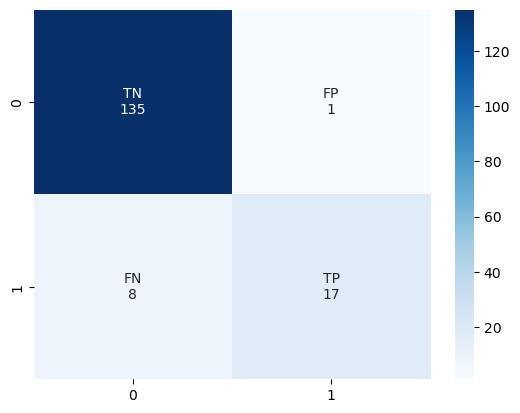

In [106]:
# LINEA BASE: 70% a ver ¿cómo se sube?
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [107]:
my_dataset = [
    "Direccion domicilio",
    "Método Orquestador"
]
# my_dataset = df['text_preprocess'].values

for i in range(len(my_dataset)):
    my_dataset[i] = normalizeString(my_dataset[i])
domain_prediction = classifier.predict(tfidf_vectorizer.transform(np.array(my_dataset)))

dictionary_domain = {
    0: "Clientes",
    1: "Canales"
}

for i, prediction in enumerate(domain_prediction):

    print("Entrada: ", my_dataset[i])
    print("Predicción: ", dictionary_domain[domain_prediction[i]])

Entrada:  direccion domicili
Predicción:  Clientes
Entrada:  metod orquest
Predicción:  Canales


# Intent clasification

In [26]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...


True

In [99]:
import json

intents = []

for i in range(len(df)):

    try:
        tag = df.loc[i, "Campo"]
    except:
        continue
    if str(tag) == 'nan':
        continue
    patterns = []

    if str(df.loc[i, "text_preprocess"]) != 'nan':
        patterns.append(df.loc[i, "text_preprocess"])
        patterns.append(df.loc[i, "text_preprocess"])

    responses = [df.loc[i, "text"]]
    print(tag, patterns)
    intents.append(
        {
            "tag": tag,
            "patterns": patterns,
            "responses": responses
        }
    )

with open("./intents.json", "w") as fin:
    json.dump({"intents": intents}, fin)

# InfoTecnicaNombreCampoFuenteOficial HOME_BRANCH_NO

Agencia ['agenci', 'agenci']
Agencia creación ['agenci creacion', 'agenci creacion']
Ahorro programado ['ahorr program', 'ahorr program']
Año fabricación del vehículo ['ano fabricacion del vehicul', 'ano fabricacion del vehicul']
Apellidos y nombres del cónyuge ['apell y nombr del conyug', 'apell y nombr del conyug']
Asesor ['asesor', 'asesor']
Asesor creación ['asesor creacion', 'asesor creacion']
Asistencia ['asistent', 'asistent']
Estado activo cliente ['estad activ client', 'estad activ client']
Segundo nombre cliente ['segund nombr client', 'segund nombr client']
Teléfono de trabajo adicional 2 ['telefon de trabaj adicional 2', 'telefon de trabaj adicional 2']
Estado civil ['estad civil', 'estad civil']
Estado del cliente ['estad del client', 'estad del client']
Fecha de alta ['fech de alta', 'fech de alta']
Fecha de carga ['fech de carg', 'fech de carg']
Fecha de datos financieros ['fech de dat financier', 'fech de dat financier']
Fecha de eliminación del cliente ['fech de elimin

In [100]:
import random
import json
import pickle
import numpy as np

import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

lemmatizer = WordNetLemmatizer()

intents = json.loads(open('./intents.json').read())

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',']

for intent in intents['intents']:

    for pattern in intent["patterns"]:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, intent["tag"]))

        if intent["tag"] not in classes:
            classes.append(intent["tag"])

words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words = sorted(set(words))
print(words)

classes = sorted(set(classes))

pickle.dump(words, open("words.pkl", "wb"))
pickle.dump(classes, open("classes.pkl", "wb"))

training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]

    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])


random.shuffle(training)
training = np.array(training)

train_x = list(training[:, 0])
train_y = list(training[:, 1])

model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))

sgd = SGD(learning_rate=0.01, momentum=0.9,nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save("domain_model.h5", hist)

print("Done")

['1', '2', '3', 'a', 'accion', 'activ', 'actual', 'actualizacion', 'adicional', 'agenci', 'ahorr', 'algun', 'alta', 'ambient', 'ano', 'anterior', 'antigued', 'anual', 'apell', 'aplic', 'aplicacion', 'apoder', 'asesor', 'asistent', 'avalu', 'banc', 'bancs', 'bien', 'call', 'canal', 'capital', 'carg', 'casill', 'cedul', 'celul', 'central', 'cif', 'ciud', 'civil', 'clas', 'clasificacion', 'client', 'cnb', 'codig', 'comentari', 'comercial', 'complet', 'con', 'conquist', 'constitucion', 'contabil', 'contador', 'conyug', 'corre', 'cost', 'couri', 'creacion', 'cuent', 'dat', 'de', 'del', 'dependent', 'depur', 'descripcion', 'desercion', 'detall', 'direccion', 'dirigent', 'do', 'domicili', 'e', 'econom', 'edad', 'edifici', 'ee', 'egres', 'ejecut', 'el', 'electron', 'eliminacion', 'emple', 'empres', 'en', 'enmascar', 'est', 'estad', 'estudi', 'exencion', 'expiracion', 'expuest', 'exterior', 'extranjer', 'fabricacion', 'fallec', 'famili', 'fech', 'fin', 'financier', 'fiscal', 'fuent', 'gast', 'g

C:\Users\usuario\AppData\Local\Temp\ipykernel_19120\1852011512.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


136/136 [==============================] - 1s 1ms/step - loss: 5.4230 - accuracy: 0.0103
Epoch 2/200
136/136 [==============================] - 0s 1ms/step - loss: 5.3519 - accuracy: 0.0369
Epoch 3/200
136/136 [==============================] - 0s 1ms/step - loss: 5.2120 - accuracy: 0.0428
Epoch 4/200
136/136 [==============================] - 0s 1ms/step - loss: 5.0307 - accuracy: 0.0546
Epoch 5/200
136/136 [==============================] - 0s 1ms/step - loss: 4.8075 - accuracy: 0.0944
Epoch 6/200
136/136 [==============================] - 0s 1ms/step - loss: 4.5162 - accuracy: 0.1342
Epoch 7/200
136/136 [==============================] - 0s 1ms/step - loss: 4.1880 - accuracy: 0.1711
Epoch 8/200
136/136 [==============================] - 0s 1ms/step - loss: 3.9290 - accuracy: 0.1917
Epoch 9/200
136/136 [==============================] - 0s 1ms/step - loss: 3.6497 - accuracy: 0.2153
Epoch 10/200
136/136 [==============================] - 0s 1ms/step - loss: 3.3705 - accuracy: 0.2493
E

In [101]:
import random
import json
import pickle
import numpy as np

import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model


lemmatizer = WordNetLemmatizer()

intents = json.loads(open('intents.json').read())


words = pickle.load(open("words.pkl", "rb"))
classes = pickle.load(open("classes.pkl", "rb"))

model = load_model("domain_model.h5")

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words


def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)

    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    
    return np.array(bag)


def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = model.predict(np.array([bow]))[0]

    ERROR_THRESHOLD = 0.01
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)

    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

    return return_list

def get_response(intents_list, intents_json):
    tag = intents_list[0]["intent"]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents:
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            break
    return result

message = input(">>")
ints= predict_class(message)
res = get_response(ints, intents)
print(res)

1/1 [==============================] - 0s 41ms/step
Marca de BANCS


# Reglas duras

In [115]:
from functools import lru_cache

def lev_dist(a, b):
    '''
    This function will calculate the levenshtein distance between two input
    strings a and b
    
    params:
        a (String) : The first string you want to compare
        b (String) : The second string you want to compare
        
    returns:
        This function will return the distnace between string a and b.
        
    example:
        a = 'stamp'
        b = 'stomp'
        lev_dist(a,b)
        >> 1.0
    '''
    
    @lru_cache(None)  # for memorization
    def min_dist(s1, s2):

        if s1 == len(a) or s2 == len(b):
            return len(a) - s1 + len(b) - s2

        # no change required
        if a[s1] == b[s2]:
            return min_dist(s1 + 1, s2 + 1)

        return 1 + min(
            #min_dist(s1, s2 + 1),      # insert character
            #min_dist(s1 + 1, s2),      # delete character
            min_dist(s1 + 1, s2 + 1),  # replace character
        )

    return min_dist(0, 0)

In [116]:
lev_dist("Método Orquestador", "Método Orquestador Nombre del método ejecutado")

28

In [114]:
lev_dist("Método Orquestador para la parte de canales", "Método Orquestador Nombre del método ejecutado")

22

# END